# Viterbi Algorithm_Problem 7.1_Hw7_CSE 250A_Fall 2022

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def floatlistconvert(strlist):    #function to convert a character list to a float list, if applicable 
    intlist=[float(stringel) for stringel in strlist]
    return intlist

###########creating transition matrix, emission matrix, initial state distribution vector#####################################

# in our case: we have T=430000 observations, n=27 hidden states and m=2=no. of values the outputs take
# then our transiion matrix (a_ij) should be of dimension=n X n=27 X 27 
# then our emission matrix (b_ij) should be of dimension=n X m=27 X 2 
# then our initial state distribution vector (\pi_i) should be of dimension=n X 1=27 X 1


# making initial state distribution vector: we call it 'p' here :
plist=[]
with open('initialStateDistribution.txt') as f:
    for line in f:
        plist.append(line.strip()) 
        
plist=floatlistconvert(plist) 
p=np.array(plist)
n=len(p)
#print(np.shape(p))
#print(p)

# making emission matrix: we call it 'b' here :
bprime1=np.loadtxt("emissionMatrix.txt", dtype=str, delimiter=',')
bprime2=[line.replace('\t', ' ') for line in bprime1]
bprime3=[line.split() for line in bprime2]
b=np.array([floatlistconvert(item) for item in bprime3])
#print(b)
#print(np.shape(b))

m=len(b[0,:])

# making transition matrix: we call it 'a' here :
aprime1=np.loadtxt("transitionMatrix.txt", dtype=str, delimiter=',')
aprime2=[line.replace('\t', ' ') for line in aprime1]
aprime3=[line.split() for line in aprime2]
a=np.array([floatlistconvert(item) for item in aprime3])
#print(a)
#print(np.shape(a))

########################## reading the observations file############################################
# we call the vector with observations as 'o' here

o=np.loadtxt("observations.txt", dtype='i')
#print(np.shape(o))
T=len(o)


#####################################calculating argmax by viterbi algorithm#######################

### creating l* matrix: left to right: column by column : we just call it l matrix
l=np.zeros((n,T), dtype=float)
l[:,0]=np.add(np.log(p), np.log(b[:,o[0]]))  # creating first column of l

for t in range(1,T):
    for j in range(n):
        l[j,t]=np.amax(np.add(l[:,t-1],np.log(a[:,j])))+np.log(b[j,o[t]])


### creating s vector of argmaxes
s1=np.zeros((T,1), dtype=int)
s1[-1]=np.argmax(l[:,-1])  # +1 because numpy starts a vector/matrix indexing from 0
for t in range(2,T+1):
    s1[-t]=np.argmax(np.add(l[:,-t],np.reshape(np.log(a[:,s1[1-t]]), (27,))))  


s1=s1+1 # +1 because numpy starts a vector/matrix indexing from 0

s=s1.reshape(T,)


Text(0.5, 1.0, 'Plot of most likely sequence of hidden states versus time')

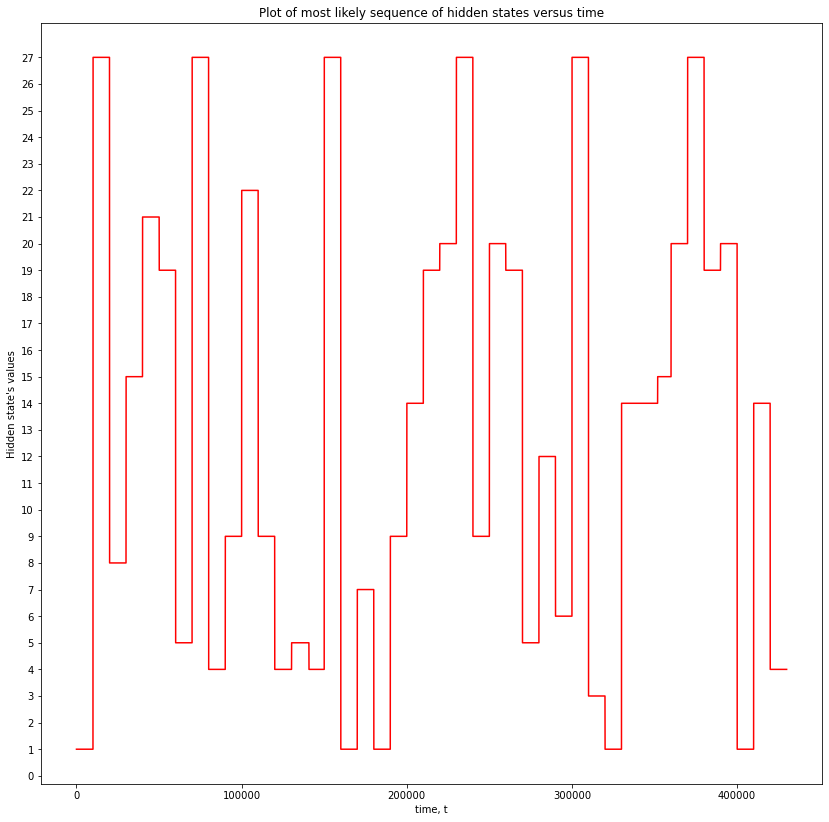

In [72]:
# plotting part
time=np.linspace(1, T, num=T)
fig, ax = plt.subplots(figsize=(14, 14))
ax.plot(time, s, color='r')
plt.yticks(np.arange(28))

plt.xlabel("time, t")
plt.ylabel("Hidden state's values")
plt.title("Plot of most likely sequence of hidden states versus time")


In [73]:
# deciphering the sentence (modulo repititions)
import string

alphabet_string = string.ascii_uppercase

alphalist= list(alphabet_string) #Creates a list of all uppercase letters

def stoalphaconv(index):
    if index==27: 
        return ' '
    else:
        return alphalist[index-1]

dectxt=stoalphaconv(s[0])    #dectxt is the deciphered text 

for t in range(1,T):
    if s[t]!=s[t-1]:
        dectxt=dectxt+stoalphaconv(s[t])
        
print(f"The deciphered text from the plot (ignoring repetitions of letters) is: {dectxt}")

The deciphered text from the plot (ignoring repetitions of letters) is: A HOUSE DIVIDED AGAINST ITSELF CANOT STAND
